In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
dataset=pd.read_csv("Absenteeism-data.csv")
dataset1=dataset.copy()
dataset.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [3]:
df_num=dataset[['Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index']]
df_cat=dataset[['Reason for Absence','Education']]

In [4]:
dataset.Education.unique()

array([1, 3, 2, 4], dtype=int64)

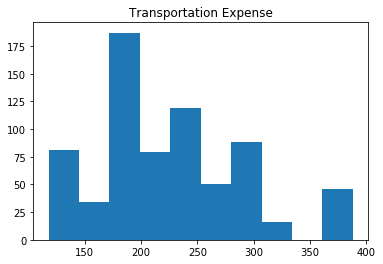

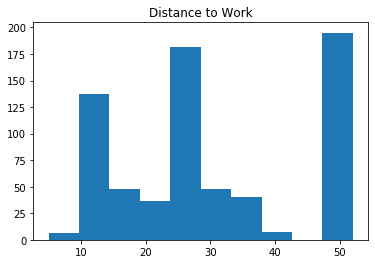

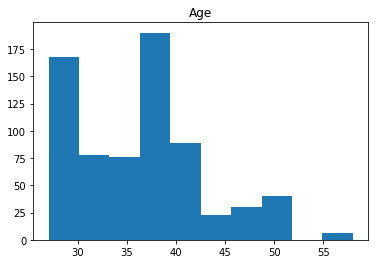

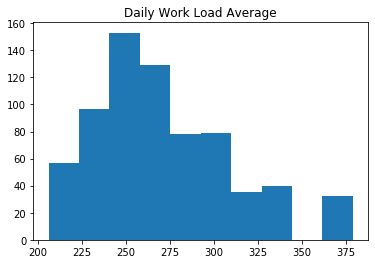

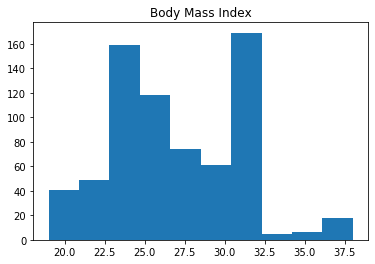

In [5]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F4FD7D0>,
      dtype=object)

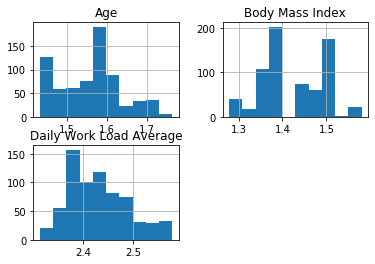

In [6]:
data=np.log10(df_num[['Age','Body Mass Index','Daily Work Load Average']])
data.hist()

In [7]:
dataset['Age']=np.log10(dataset['Age'])
dataset['Body Mass Index']=np.log10(dataset['Body Mass Index'])
dataset['Daily Work Load Average']=np.log10(dataset['Daily Work Load Average'])

In [8]:
'''dataset['Reason for Absence']=dataset['Reason for Absence']/len(dataset['Reason for Absence'])
dataset['Reason for Absence'].head()'''

"dataset['Reason for Absence']=dataset['Reason for Absence']/len(dataset['Reason for Absence'])\ndataset['Reason for Absence'].head()"

In [9]:
dataset.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [10]:
def edu(e):
    if e in (2,3,4):
        return 1
    else:
        return 0
edu=dataset.Education.apply(edu)
data['Education']=edu

In [11]:
data['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [12]:
dataset['Children'].value_counts()

0    285
1    213
2    146
4     42
3     14
Name: Children, dtype: int64

In [13]:
dataset.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,1.518514,2.379403,1.477121,1,2,1,4
1,36,0,14/07/2015,118,13,1.698970,2.379403,1.491362,1,1,0,0
2,3,23,15/07/2015,179,51,1.579784,2.379403,1.491362,1,0,0,2
3,7,7,16/07/2015,279,5,1.591065,2.379403,1.380211,1,2,0,4
4,11,23,23/07/2015,289,36,1.518514,2.379403,1.477121,1,2,1,2


In [14]:
def date_s(d):
    return int(d.split('/')[0])
        
dats=dataset['Date'].apply(date_s)
dataset['date']=dats

In [15]:
def month_s(d):
    return int(d.split('/')[1])
        
dats=dataset['Date'].apply(month_s)
dataset['month']=dats

In [16]:
def year_s(d):
    return int(d.split('/')[2])
        
dats=dataset['Date'].apply(year_s)
dataset['year']=dats

In [17]:
dataset.drop(['ID','Date'],axis=1).head()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,date,month,year
0,26,289,36,1.518514,2.379403,1.477121,1,2,1,4,7,7,2015
1,0,118,13,1.698970,2.379403,1.491362,1,1,0,0,14,7,2015
2,23,179,51,1.579784,2.379403,1.491362,1,0,0,2,15,7,2015
3,7,279,5,1.591065,2.379403,1.380211,1,2,0,4,16,7,2015
4,23,289,36,1.518514,2.379403,1.477121,1,2,1,2,23,7,2015


In [18]:
col=['Reason for Absence', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets','date', 'month',
       'year','Absenteeism Time in Hours']
dataset=dataset[col]
dataset.head()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,date,month,year,Absenteeism Time in Hours
0,26,289,36,1.518514,2.379403,1.477121,1,2,1,7,7,2015,4
1,0,118,13,1.698970,2.379403,1.491362,1,1,0,14,7,2015,0
2,23,179,51,1.579784,2.379403,1.491362,1,0,0,15,7,2015,2
3,7,279,5,1.591065,2.379403,1.380211,1,2,0,16,7,2015,4
4,23,289,36,1.518514,2.379403,1.477121,1,2,1,23,7,2015,2


In [19]:
median=np.median(dataset['Absenteeism Time in Hours'])

In [20]:
dataset['Absenteeism Time in Hours']=np.where(dataset['Absenteeism Time in Hours']>median,1,0)
dataset.head()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,date,month,year,Absenteeism Time in Hours
0,26,289,36,1.518514,2.379403,1.477121,1,2,1,7,7,2015,1
1,0,118,13,1.698970,2.379403,1.491362,1,1,0,14,7,2015,0
2,23,179,51,1.579784,2.379403,1.491362,1,0,0,15,7,2015,0
3,7,279,5,1.591065,2.379403,1.380211,1,2,0,16,7,2015,1
4,23,289,36,1.518514,2.379403,1.477121,1,2,1,23,7,2015,0


In [21]:
dataset.columns

Index(['Reason for Absence', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'date', 'month', 'year',
       'Absenteeism Time in Hours'],
      dtype='object')

In [22]:
'''scaling_data=dataset[['Reason for Absence', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'date', 'month', 'year']]'''

"scaling_data=dataset[['Reason for Absence', 'Transportation Expense', 'Distance to Work',\n       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',\n       'Children', 'Pets', 'date', 'month', 'year']]"

In [23]:
'''from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()
absenteeism_scaler.fit(scaling_data)
scaled_inputs = absenteeism_scaler.transform(scaling_data)
scaled_inputs'''

'from sklearn.preprocessing import StandardScaler\nabsenteeism_scaler = StandardScaler()\nabsenteeism_scaler.fit(scaling_data)\nscaled_inputs = absenteeism_scaler.transform(scaling_data)\nscaled_inputs'

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
dataset.iloc[:,:-1]=MinMaxScaler().fit_transform(dataset.iloc[:,:-1])

In [26]:
'''dataset[['Reason for Absence','Transportation Expense', 'Distance to Work','Education',
       'Children', 'Pets', 'date', 'month', 'year']]=MinMaxScaler().fit_transform(dataset[['Reason for Absence','Transportation Expense', 'Distance to Work','Education',
       'Children', 'Pets', 'date', 'month', 'year']])
dataset.head()'''

"dataset[['Reason for Absence','Transportation Expense', 'Distance to Work','Education',\n       'Children', 'Pets', 'date', 'month', 'year']]=MinMaxScaler().fit_transform(dataset[['Reason for Absence','Transportation Expense', 'Distance to Work','Education',\n       'Children', 'Pets', 'date', 'month', 'year']])\ndataset.head()"

In [27]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
order_feature=SelectKBest(score_func=chi2,k=10)
order_feature.fit(x,y)

SelectKBest(k=10, score_func=<function chi2 at 0x0F6A8078>)

In [30]:
pd.DataFrame(order_feature.scores_)

,0
0,3.592357
1,6.644770
2,0.010498
3,0.129389
4,0.117232
5,0.039697
6,0.070873
7,9.749629
8,0.145920
9,0.023784


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
gnb=GaussianNB()
cv=cross_val_score(gnb,x_train,y_train,cv=5)
print(cv.mean())

0.6571428571428571


In [34]:
reg=LogisticRegression(max_iter=2000)
cv=cross_val_score(reg,x_train,y_train,cv=5)
print(cv.mean())

0.6464285714285715


In [35]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,x_train,y_train,cv=5)
print(cv.mean())

0.6803571428571429


In [36]:
rf=RandomForestClassifier(random_state=1)
cv=cross_val_score(rf,x_train,y_train,cv=5)
print(cv.mean())

0.7732142857142856


In [37]:
svc=SVC(probability=True)
cv=cross_val_score(svc,x_train,y_train,cv=5)
print(cv.mean())

0.6964285714285714
